In [ ]:
import numpy as np

### Generate Data
Create a function that randomly gives either +1 or -1 as input

In [ ]:
def create_u():
  """
  Inputs:
    None
  Outputs:
    u: +1 or -1 randomly generated
  """
  # YOUR CODE HERE
  rand_nos = np.random.rand(1,)

  if (rand_nos <= 0.5):
    u = 1
  else:
    u = -1
    
  return u

#### Desired data
$y(t+1) = ay(t) + by(t-1) + cu(t) $

In [ ]:
"""Test for create_u"""
u = create_u()
assert u==1 or u== -1


In [ ]:
def generate_data(timesteps, a, b, c):
  """
  Inputs:
    timesteps: int, number of timesteps of data
  Outputs:
    u: numpy array with each element +1 or -1 of shape (timesteps, )
    yd: numpy array with each element computed using above equation of shape (timesteps, )
  """
  # YOUR CODE HERE
  u = np.array([create_u() for i in range(timesteps)])
  yd = np.zeros((timesteps+1,))

  for j in range(1, timesteps):
    yd[j + 1] = a * yd[j] + b * yd[j - 1] + c * u[j]

  return u, yd


In [ ]:
### Generate u, yd
u, yd = generate_data(10000, 1.1, -0.3, 0.5)

### Define the model that we are going to train
$y(t+1) = w_0y(t) + w_1y(t-1) + w_2u(t)$

In [ ]:
def get_y_tplus1(w, yt, ytminus1, u):
  """
  Inputs:
    w: numpy array of weights of shape (3, )
    yt: float, y value at time t
    ytminus1: float, y value at time t - 1
    u: input at time t
  Outputs:
    y_tplus1: float, y at t+1
  """
  # YOUR CODE HERE
  y_tplus1 = w[0] * yt + w[1] * ytminus1 + w[2] * u
  return y_tplus1

### Forward propagation of gradients
We propagate the gradients forwards using the following recurrence relations
$$
\frac{\partial y(t+1)}{\partial w_0} = w_0\frac{\partial y(t)}{\partial w_0} + y(t) + w_1\frac{\partial y(t-1)}{\partial w_0}
$$
<br><br>
$$
\frac{\partial y(t+1)}{\partial w_1} = w_0\frac{\partial y(t)}{\partial w_1} + y(t-1) + w_1\frac{\partial y(t-1)}{\partial w_1} \\
$$
<br><br>
$$
\frac{\partial y(t+1)}{\partial w_2} = w_0\frac{\partial y(t)}{\partial w_2} +  w_1\frac{\partial y(t-1)}{\partial w_2} + u(t) 
$$
<br><br>
pwj1 is a matrix $\frac{\partial y(t)}{\partial w} =
[\frac{\partial y(t)}{\partial w_0}, \frac{\partial y(t)}{\partial w_1}, \frac{\partial y(t)}{\partial w_2}]$
<br><br>
pwj0 is a matrix $\frac{\partial y(t-1)}{\partial w} =
[\frac{\partial y(t-1)}{\partial w_0}, \frac{\partial y(t-1)}{\partial w_1}, \frac{\partial y(t-1)}{\partial w_2}]$
<br><br>
pwj2 is a matrix $\frac{\partial y(t+1)}{\partial w} =
[\frac{\partial y(t+1)}{\partial w_0}, \frac{\partial y(t+1)}{\partial w_1}, \frac{\partial y(t+1)}{\partial w_2}]$

In [ ]:
def forward_prop_gradients(w, yt, ytminus1, u, pwj1, pwj0):
  """
  Inputs:
    w: numpy array of weights [w0, w1, w2]
    yt: float, y value at time t
    ytminus1: float, y value at time t - 1
    u: input at time t
    pwj1: numpy array of shape (3, ) as described above
    pwj0: numpy array of shape (3, ) as described above
  Outputs:
    pwj2: numpy array of shape (3, ) as described above
  """  
  # YOUR CODE HERE
  x = w[0]*pwj1[0] + yt + w[1]*pwj0[0]
  y = w[0]*pwj1[1] + ytminus1 + w[1]*pwj0[1]
  z = w[0]*pwj1[2] + u + w[1]*pwj0[2]

  pwj2 = [x, y, z]
  return pwj2

### Weight update - Gradient descent
$E = \frac{1}{2}(y_d - y)^2$ <br>
$w_{new} = w_{old} - \eta\frac{\partial E}{\partial w} = w_{old} - \eta(y_d - y)\cdot pwj_2$ 

In [ ]:
def update_w(w, eta, yd, y, pwj2):
  """
  Inputs:
    w: numpy array of weights [w0, w1, w2]
    eta: float, learning rate
    yd: scalar(float), desired value of y at time t+1
    y: scalar(float), predicted value of y at time t+1
    pwj2: numpy array of shape(3,) obtained from forward_prop_weights
  Outputs:
    w_updated: numpy array of shape(3, ), updated weights
  """
  # YOUR CODE HERE
  for k in range(3):
    w[k] = w[k] + eta*(yd - y)*pwj2[k]
    
  w_updated = w
  return w_updated

### Cost function (error)
$E = \frac{1}{2}(y_d - y)^2$ <br>


In [ ]:
def err(yd, y):
  """
  Inputs:
    yd: scalar(float), desired value of y at time t+1
    y: scalar(float), predicted value of y at time t+1
  Outputs:
    E: scalar(float), error as described above 
  """
  # YOUR CODE HERE
  error = (yd - y)
  E = 0.5 * (error ** 2)
  return E

### Apply RTRL

In [ ]:
def RTRL(yd, eta, timesteps):
  """
  Inputs:
    yd: numpy array of shape(timesteps,) 
    u: Inputs used to generate yd
    eta: scalar(float), learning rate
    timesteps: int, number of timesteps
  Outputs:
    west: numpy array of shape(timesteps,3), keeps track of all the updated weights over time
    error: numpy array of shape(timesteps,), keeps track of error (as obtained from function err()) over time
  """
  # YOUR CODE HERE
  y = np.zeros((timesteps+1,))
  error = np.zeros((timesteps,))
  
  w = np.zeros((3, 1))
  pw = np.zeros((timesteps+1, 3))
  west = np.zeros((timesteps, 3))
  
  
  for j in range (1,iterations):
      
      y[j+1] = get_y_tplus1(w, y[j], y[j-1], u[j])
      
      pw[j+1, 0], pw[j+1, 1], pw[j+1, 2] = forward_prop_gradients(w, y[j], y[j-1], u[j], pw[j,:], pw[j-1,:])
      
      
      w = update_w(w, eta, yd[j+1], y[j+1], pw[j+1, :])
      
      for k in range(3):
        west[j,k] = w[k]

      error[j] = err(yd[j+1], y[j+1])
  return west, error
   

In [ ]:
def plot_w(west):
  plt.plot(west[:,0])
  plt.show()
  plt.plot(west[:,1])
  plt.show()
  plt.plot(west[:,2])
  plt.show()

In [ ]:
def plot_err(error):
  plt.plot(error)
  plt.show()

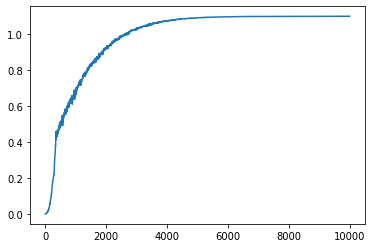

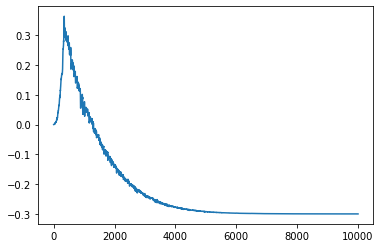

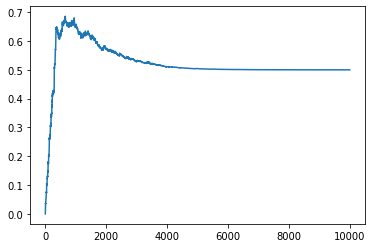

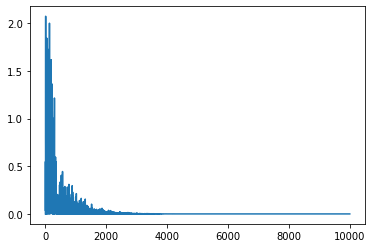

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

eta = 0.005
iterations = 10000

west, error = RTRL(yd, eta, iterations)

plot_w(west)
plot_err(error)